In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

**Pagerank**

In [ ]:
# init graph

import numpy as np

class Graph:
  def __init__(self):
    self.nodes = []
  
  def contains(self, name):
    for node in self.nodes:
      if(node.name == name):
        return True
    return False
  
  # Return the node with the name, create and return new node if not found
  def find(self, name):
    if(not self.contains(name)):
      new_node = Node(name)
      #print(new_node.name)
      self.nodes.append(new_node)
      return new_node
    else:
      return next(node for node in self.nodes if node.name == name)
  
  def add_edge(self, parent, child):
    parent_node = self.find(parent)
    child_node = self.find(child)

    parent_node.link_child(child_node)
    child_node.link_parent(parent_node)
  
  def display(self):
    for node in self.nodes:
      print(f'{node.name} links to {[child.name for child in node.children]}')
      #print(node.name)
  
  def sort_nodes(self):
    self.nodes.sort(key=lambda node: int(node.name))
  
  def normalize_pagerank(self):
    pagerank_sum = sum(node.pagerank for node in self.nodes)

    for node in self.nodes:
      node.pagerank = node.pagerank/pagerank_sum
  
  def get_pagerank_list(self):
    pagerank_list = np.asarray([node.pagerank for node in self.nodes], dtype='float32')
    #return np.round(pagerank_list,9)
    return pagerank_list

class Node:
  def __init__(self, name):
    self.name = name
    self.children = []
    self.parents = []
    self.pagerank = 1.0
  
  def link_child(self, new_child):
    for child in self.children:
      if (child.name == new_child.name):
        return None
    self.children.append(new_child)
  
  def link_parent(self, new_parent):
    for parent in self.parents:
      if(parent.name == new_parent.name):
        return None 
    self.parents.append(new_parent)
  
  def update_pagerank(self, d, n):
    in_neighbors = self.parents
    pagerank_sum = sum((node.pagerank/len(node.children)) for node in in_neighbors)
    random_jumping = d/n 
    self.pagerank = random_jumping + (1-d)*pagerank_sum


In [ ]:
# util init graph with txt file
def init_graph(fname):
  with open(fname) as f:
    lines = f.readlines()
  
  graph = Graph()

  for line in lines:
    [parent, child] = line.strip().split(',')
    graph.add_edge(parent, child)
  
  graph.sort_nodes()

  return graph

In [ ]:
# Pagerank functions
def Pagerank_one_iter(graph, d):
  node_list = graph.nodes
  for node in node_list:
    node.update_pagerank(d, len(graph.nodes))
  graph.normalize_pagerank()

def PageRank(graph, d, iteration=100):
  for i in range(iteration):
    Pagerank_one_iter(graph, d)
    

In [ ]:
#convert csv to txt
with open("masked_dataset_300_filtered.csv") as f:
  lines = f.readlines()

pairs = []
for line in lines[1:]:
  nodes = line.strip().split(',')
  pair = (int(nodes[0]), int(nodes[1]))
  pairs.append(pair)

with open('masked_dataset_300_filtered.txt', 'w') as f:
  for pair in pairs:
    f.write(f'{pair[0]},{pair[1]}\n')

In [ ]:
graph= init_graph('masked_dataset_300_filtered.txt')

In [ ]:
trans_counting_list = pd.read_csv("masked_300_gas_count.csv")

In [ ]:
trans_counting_list.head(10)

,node,NoT,NoR,Node_degree,sent_gas,received_gas,total_gas
0,0,63.0,14.0,77.0,1464148.0,294000.0,1758148.0
1,1,0.0,1.0,1.0,0.0,21000.0,21000.0
2,2,1.0,0.0,1.0,128629.0,0.0,128629.0
3,3,0.0,424.0,424.0,0.0,66796831.0,66796831.0
4,4,214.0,0.0,214.0,4664115.0,0.0,4664115.0
5,5,0.0,1.0,1.0,0.0,21000.0,21000.0
6,6,1.0,0.0,1.0,21000.0,0.0,21000.0
7,7,18.0,46.0,64.0,430893.0,966000.0,1396893.0
8,8,1.0,0.0,1.0,31097.0,0.0,31097.0
9,9,0.0,2297.0,2297.0,0.0,89771110.0,89771110.0


In [ ]:
node_degree = trans_counting_list.Node_degree
num_of_transfer = trans_counting_list.NoT
num_of_receive = trans_counting_list.NoR
sent_gas =trans_counting_list.sent_gas
re_gas = trans_counting_list. received_gas
total_gas = trans_counting_list.total_gas



Run pagerank with damping factor changing

In [ ]:

iteration = 100
list_pg_rank = []
list_corr = []
for d_ in np.arange(0.1, 0.9, 0.05):
  d = 1 - d_
  PageRank(graph, d, iteration)
  rank_vector = graph.get_pagerank_list()
  list_pg_rank.append(rank_vector)
  page_list = []
  for j in range(len(rank_vector)):
    node_score = {"address_id":j, "pgrank_score":rank_vector[j]}
    page_list.append(node_score)
  print(1-d)
  pagerank_list = sorted(page_list, key = lambda row_:row_['pgrank_score'], reverse=True)
  print(pagerank_list[:20])

0.09999999999999998
[{'address_id': 18, 'pgrank_score': 0.015055358}, {'address_id': 9, 'pgrank_score': 0.012090955}, {'address_id': 22, 'pgrank_score': 0.008810301}, {'address_id': 46, 'pgrank_score': 0.0029732576}, {'address_id': 3, 'pgrank_score': 0.0020474955}, {'address_id': 161, 'pgrank_score': 0.0020134524}, {'address_id': 218, 'pgrank_score': 0.0013619988}, {'address_id': 184, 'pgrank_score': 0.0010166189}, {'address_id': 37, 'pgrank_score': 0.0009807763}, {'address_id': 60, 'pgrank_score': 0.00092195434}, {'address_id': 78, 'pgrank_score': 0.0008532724}, {'address_id': 187, 'pgrank_score': 0.00083631504}, {'address_id': 581, 'pgrank_score': 0.0007613543}, {'address_id': 148, 'pgrank_score': 0.00068951497}, {'address_id': 302, 'pgrank_score': 0.00066170684}, {'address_id': 405, 'pgrank_score': 0.0006579296}, {'address_id': 258, 'pgrank_score': 0.00055136625}, {'address_id': 54, 'pgrank_score': 0.00054610573}, {'address_id': 20, 'pgrank_score': 0.00052386476}, {'address_id': 104

In [ ]:
corr_not = []
corr_nor = []
corr_node_degree = []
corr_sent_gas = []
corr_re_gas = []
corr_total_gas = []

In [ ]:
from scipy.stats import kendalltau

In [ ]:
for pg_rank in list_pg_rank:
  corr, _ = kendalltau(num_of_receive, pg_rank)
  corr_nor.append(corr)

for pg_rank in list_pg_rank:
  corr, _ = kendalltau(num_of_transfer, pg_rank)
  corr_not.append(corr)

for pg_rank in list_pg_rank:
  corr, _ = kendalltau(node_degree, pg_rank)
  corr_node_degree.append(corr)

for pg_rank in list_pg_rank:
  corr, _ = kendalltau(sent_gas, pg_rank)
  corr_sent_gas.append(corr)

for pg_rank in list_pg_rank:
  corr, _ = kendalltau(re_gas, pg_rank)
  corr_re_gas.append(corr)

for pg_rank in list_pg_rank:
  corr, _ = kendalltau(total_gas, pg_rank)
  corr_total_gas.append(corr)

In [ ]:
corr_nor_300 = corr_nor.copy()

In [ ]:
corr_nor_100_norm= []
for value in corr_nor_100:
  value_norm = (value - min(corr_nor_100))/(max(corr_nor_100) - min(corr_nor_100))
  corr_nor_100_norm.append(value_norm)

In [ ]:
corr_nor_50_norm= []
for value in corr_nor_50:
  value_norm = (value - min(corr_nor_50))/(max(corr_nor_50) - min(corr_nor_50))
  corr_nor_50_norm.append(value_norm)

In [ ]:
corr_nor_10_norm= []
for value in corr_nor_10:
  value_norm = (value - min(corr_nor_10))/(max(corr_nor_10) - min(corr_nor_10))
  corr_nor_10_norm.append(value_norm)

In [ ]:
corr_nor_200_norm= []
for value in corr_nor_200:
  value_norm = (value - min(corr_nor_200))/(max(corr_nor_200) - min(corr_nor_200))
  corr_nor_200_norm.append(value_norm)

In [ ]:
corr_nor_300_norm= []
for value in corr_nor_300:
  value_norm = (value - min(corr_nor_300))/(max(corr_nor_300) - min(corr_nor_300))
  corr_nor_300_norm.append(value_norm)

In [ ]:
corr_nor_0_norm= []
for value in corr_nor_0:
  value_norm = (value - min(corr_nor_0))/(max(corr_nor_0) - min(corr_nor_0))
  corr_nor_0_norm.append(value_norm)

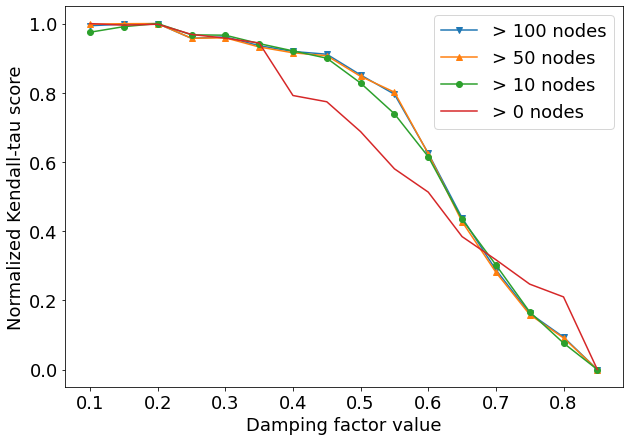

In [ ]:
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10, 7))

labels = ["0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9"]
def set_axis_style(ax, labels):
  ax.get_xaxis().set_tick_params(direction='out')
  ax.xaxis.set_ticks_position('bottom')
  ax.set_xticks([0,2,4,6,8,10,12,14,16])
  ax.set_xticklabels(labels)

#plt.title("Pagerank - NoR rank correlation for damping factor value", fontsize=13)
plt.ylabel("Normalized Kendall-tau score")
plt.xlabel("Damping factor value")
set_axis_style(ax, labels)
plt.plot(corr_nor_100_norm, "v-",label = "> 100 nodes")
plt.plot(corr_nor_50_norm,"^-", label = "> 50 nodes")
plt.plot(corr_nor_10_norm,"o-", label = "> 10 nodes")
plt.plot(corr_nor_0_norm, label = "> 0 nodes")
#plt.plot(corr_nor_200_norm)
#plt.plot(corr_nor_300_norm)
plt.legend()
plt.show()